## Interfata pentru noduri si muchii

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import Button, Text, VBox, HBox, Output, Label
from IPython.display import display

# ====== Modelul de rețea ======
G = nx.Graph()
out = Output()

# ====== Elemente interfață ======
nodes_input = Text(description="Număr noduri:")
generate_btn = Button(description="Generează noduri", button_style='success')
node_label = Label(value="Noduri create: 0")

node1_input = Text(description="Nod 1:")
node2_input = Text(description="Nod 2:")
add_edge_btn = Button(description="Adaugă legătură", button_style='info')

clear_btn = Button(description="Resetează graful", button_style='danger')

# ====== Funcții ======
def draw_graph():
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, k=1.5, iterations=200, seed=42)  # mai mult spațiu și mai multe iterații
    nx.draw(
        G, pos,
        with_labels=True,
        node_color="skyblue",
        node_size=1000,
        font_weight='bold',
        edge_color="gray",
        linewidths=1.5
    )
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def on_generate_nodes_clicked(b):
    try:
        num_nodes = int(nodes_input.value)
        if num_nodes <= 0:
            raise ValueError
        G.clear()
        for i in range(1, num_nodes + 1):
            G.add_node(i)
        node_label.value = f"Noduri create: {num_nodes}"
        with out:
            out.clear_output()
            print(f"{num_nodes} noduri generate: {list(G.nodes)}")
            draw_graph()
    except ValueError:
        with out:
            out.clear_output()
            print("⚠️ Introdu un număr valid și pozitiv de noduri.")

def on_add_edge_clicked(b):
    try:
        n1 = int(node1_input.value)
        n2 = int(node2_input.value)
        if n1 in G.nodes and n2 in G.nodes:
            G.add_edge(n1, n2)
            with out:
                out.clear_output()
                print(f"Legătură adăugată între nodurile {n1} și {n2}.")
                draw_graph()
        else:
            with out:
                out.clear_output()
                print("⚠️ Unul dintre noduri nu există.")
    except ValueError:
        with out:
            out.clear_output()
            print("⚠️ Introdu numere valide pentru noduri.")

def on_clear_clicked(b):
    G.clear()
    node_label.value = "Noduri create: 0"
    with out:
        out.clear_output()
        print("Graful a fost resetat.")
        draw_graph()

# ====== Legare evenimente ======
generate_btn.on_click(on_generate_nodes_clicked)
add_edge_btn.on_click(on_add_edge_clicked)
clear_btn.on_click(on_clear_clicked)

# ====== Layout ======
ui = VBox([
    HBox([nodes_input, generate_btn]),
    node_label,
    HBox([node1_input, node2_input, add_edge_btn]),
    clear_btn,
    out
])

display(ui)


In [5]:
from pyvis.network import Network
import networkx as nx

# Creează graful
G = nx.Graph()
G.add_nodes_from(range(1, 11))
G.add_edges_from([(1,2), (2,3), (3,4), (5,6)])

# Creează rețea interactivă
net = Network(notebook=False, height='750px', width='100%', bgcolor='#ffffff', font_color='black')

# Adaugă graful NetworkX
net.from_nx(G)

# Activează opțiuni de tragere
net.toggle_physics(True)

# Exportă și deschide în browser
net.show("grafic_interactiv.html")

grafic_interactiv.html


AttributeError: 'NoneType' object has no attribute 'render'

In [9]:
import dash
from dash import html, dcc, Input, Output, State
import dash_cytoscape as cyto

# --- Inițializare aplicație Dash ---
app = dash.Dash(__name__)

# Elemente inițiale (goale)
initial_nodes = []
initial_edges = []

# Stil pentru noduri și muchii
stylesheet = [
    {
        "selector": "node",
        "style": {
            "content": "data(label)",
            "text-valign": "center",
            "color": "black",
            "background-color": "#74b9ff",
            "width": "50px",
            "height": "50px",
            "font-size": "16px",
            "border-width": "2px",
            "border-color": "#0984e3",
        },
    },
    {
        "selector": "edge",
        "style": {
            "width": 3,
            "line-color": "#636e72",
            "target-arrow-color": "#636e72",
            "target-arrow-shape": "triangle",
            "curve-style": "bezier",
        },
    },
]

# --- Layout aplicație ---
app.layout = html.Div([
    html.H2("Rețea socială interactivă", style={"textAlign": "center"}),

    html.Div([
        html.Div([
            html.Label("Număr de noduri:"),
            dcc.Input(id="numar-noduri", type="number", min=1, placeholder="ex: 10"),
            html.Button("Generează noduri", id="btn-genereaza", n_clicks=0),
        ], style={"margin-bottom": "10px"}),

        html.Div([
            html.Label("Adaugă legătură (de la nodul X la Y):"),
            dcc.Input(id="nod1", type="number", min=1, placeholder="Nod sursă"),
            dcc.Input(id="nod2", type="number", min=1, placeholder="Nod destinație"),
            html.Button("Adaugă legătură", id="btn-legatura", n_clicks=0),
        ])
    ], style={"textAlign": "center"}),

    cyto.Cytoscape(
        id="grafic",
        layout={"name": "cose"},  # Layout fizic (mutabil cu mouse-ul)
        style={"width": "100%", "height": "600px", "background-color": "#f5f6fa"},
        elements=initial_nodes + initial_edges,
        stylesheet=stylesheet,
        userZoomingEnabled=True,
        userPanningEnabled=True,
        responsive=True,
    ),
])

# --- Callback pentru generarea nodurilor ---
@app.callback(
    Output("grafic", "elements"),
    Input("btn-genereaza", "n_clicks"),
    State("numar-noduri", "value"),
    State("grafic", "elements"),
    prevent_initial_call=True
)
def genereaza_noduri(n_clicks, numar, elements):
    if not numar:
        return elements
    nodes = [{"data": {"id": str(i), "label": str(i)}} for i in range(1, numar + 1)]
    return nodes  # Fără muchii inițial

# --- Callback pentru adăugarea de legături ---
@app.callback(
    Output("grafic", "elements", allow_duplicate=True),
    Input("btn-legatura", "n_clicks"),
    State("nod1", "value"),
    State("nod2", "value"),
    State("grafic", "elements"),
    prevent_initial_call=True
)
def adauga_legatura(n_clicks, n1, n2, elements):
    if not n1 or not n2:
        return elements
    new_edge = {"data": {"source": str(n1), "target": str(n2)}}
    # Evităm duplicarea muchiilor
    if new_edge not in elements:
        elements.append(new_edge)
    return elements

# --- Rulează aplicația ---
if __name__ == "__main__":
    app.run(debug=True)


# Construirea grafului

In [5]:
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output, State
import dash_cytoscape as cyto
import json

# Aplicația Dash
app = JupyterDash(__name__)

# Elemente inițiale goale
initial_nodes = []
initial_edges = []

# Stil noduri/muchii
stylesheet = [
    {"selector": "node",
     "style": {"content": "data(label)", "text-valign": "center", "color": "white",
               "background-color": "#74b9ff", "width": "50px", "height": "50px", "font-size": "16px"}},
    {"selector": "edge",
     "style": {"width": 2, "line-color": "#636e72", "target-arrow-color": "#636e72",
               "target-arrow-shape": "triangle", "curve-style": "bezier"}}
]

# Layout Dash
app.layout = html.Div([
    html.H2("Rețea socială interactivă", style={"textAlign": "center"}),

    html.Div([
        html.Div([
            html.Label("Număr de noduri:"),
            dcc.Input(id="numar-noduri", type="number", min=1, placeholder="ex: 10"),
            html.Button("Generează noduri", id="btn-genereaza", n_clicks=0),
        ], style={"margin-bottom": "10px"}),

        html.Div([
            html.Label("Adaugă legătură (de la nodul X la Y):"),
            dcc.Input(id="nod1", type="number", min=1, placeholder="Nod sursă"),
            dcc.Input(id="nod2", type="number", min=1, placeholder="Nod destinație"),
            html.Button("Adaugă legătură", id="btn-legatura", n_clicks=0),
        ])
    ], style={"textAlign": "center"}),

    cyto.Cytoscape(
        id="grafic",
        layout={"name": "cose"},
        style={"width": "100%", "height": "500px"},
        elements=initial_nodes + initial_edges,
        stylesheet=stylesheet,
    ),

    html.Button("Salvează rețeaua", id="btn-salveaza", n_clicks=0),
    html.Div(id="salvare-mesaj", style={"margin-top": "10px", "color": "green"})
])

# --- Callback generare noduri ---
@app.callback(
    Output("grafic", "elements"),
    Input("btn-genereaza", "n_clicks"),
    State("numar-noduri", "value"),
    prevent_initial_call=True
)
def genereaza_noduri(n_clicks, numar):
    if not numar or numar < 1:
        return []
    nodes = [{"data": {"id": str(i), "label": str(i)}} for i in range(1, numar + 1)]
    return nodes

# --- Callback adaugare legături ---
@app.callback(
    Output("grafic", "elements", allow_duplicate=True),
    Input("btn-legatura", "n_clicks"),
    State("nod1", "value"),
    State("nod2", "value"),
    State("grafic", "elements"),
    prevent_initial_call=True
)
def adauga_legatura(n_clicks, n1, n2, elements):
    if not n1 or not n2:
        return elements
    new_edge = {"data": {"source": str(n1), "target": str(n2)}}
    if new_edge not in elements:
        elements.append(new_edge)
    return elements

# --- Callback salvare ---
saved_elements = []  # variabilă globală
@app.callback(
    Output("salvare-mesaj", "children"),
    Input("btn-salveaza", "n_clicks"),
    State("grafic", "elements"),
    prevent_initial_call=True
)
def salveaza_retea(n_clicks, elements):
    global saved_elements
    saved_elements = elements  # salvăm pentru analiza ulterioară
    return "Rețeaua a fost salvată cu succes!"

app.run(mode="inline")

C:\Users\ASUS\PycharmProjects\ReteaSociala\.venv\Lib\site-packages\dash\dash.py:634: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



# Analiza retelei(graphului)

Număr noduri: 16
Număr muchii: 5
Centralitate de grad: {'1': 0.06666666666666667, '2': 0.13333333333333333, '3': 0.13333333333333333, '4': 0.06666666666666667, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.06666666666666667, '9': 0.13333333333333333, '10': 0.06666666666666667, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0}


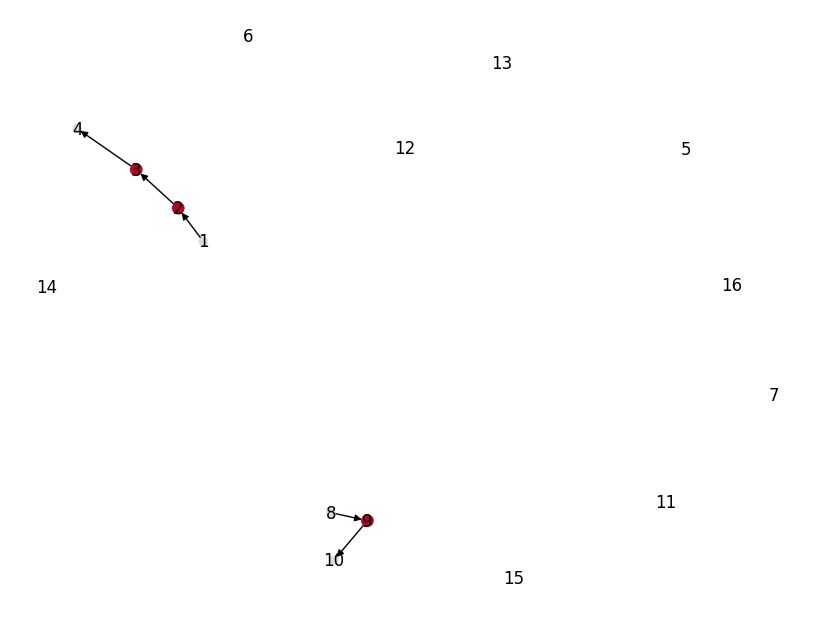

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # pentru detectare comunități

# Construim graful
G = nx.DiGraph()  # sau nx.Graph() dacă e neorientat

# Adăugăm noduri
for el in saved_elements:
    if "source" not in el["data"]:
        G.add_node(el["data"]["id"], label=el["data"]["label"])

# Adăugăm muchii
for el in saved_elements:
    if "source" in el["data"]:
        G.add_edge(el["data"]["source"], el["data"]["target"])

# --- Analitice ---
print("Număr noduri:", G.number_of_nodes())
print("Număr muchii:", G.number_of_edges())

# Centralitate de grad
deg_cent = nx.degree_centrality(G)
print("Centralitate de grad:", deg_cent)

# Coeficient de clustering
if not G.is_directed():
    clustering = nx.clustering(G)
    print("Coeficient de clustering:", clustering)

# Detectare comunități (Louvain)
if not G.is_directed():
    partition = community_louvain.best_partition(G)
    print("Comunități (nod: comunitate):", partition)

# --- Vizualizare grafic ---
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=[500*deg_cent[n] for n in G.nodes()],
        node_color=[deg_cent[n] for n in G.nodes()], cmap=plt.cm.coolwarm)
plt.show()

# Varianta a analizei cu graf orientat + graf neorientat

Număr noduri: 16
Număr muchii: 5
Centralitate de grad: {'1': 0.06666666666666667, '2': 0.13333333333333333, '3': 0.13333333333333333, '4': 0.06666666666666667, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.06666666666666667, '9': 0.13333333333333333, '10': 0.06666666666666667, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0}
Coeficient de clustering: {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0}
Comunități (nod: comunitate): {'1': 1, '2': 1, '3': 1, '4': 1, '5': 2, '6': 3, '7': 4, '8': 5, '9': 5, '10': 5, '11': 6, '12': 7, '13': 8, '14': 9, '15': 10, '16': 0}


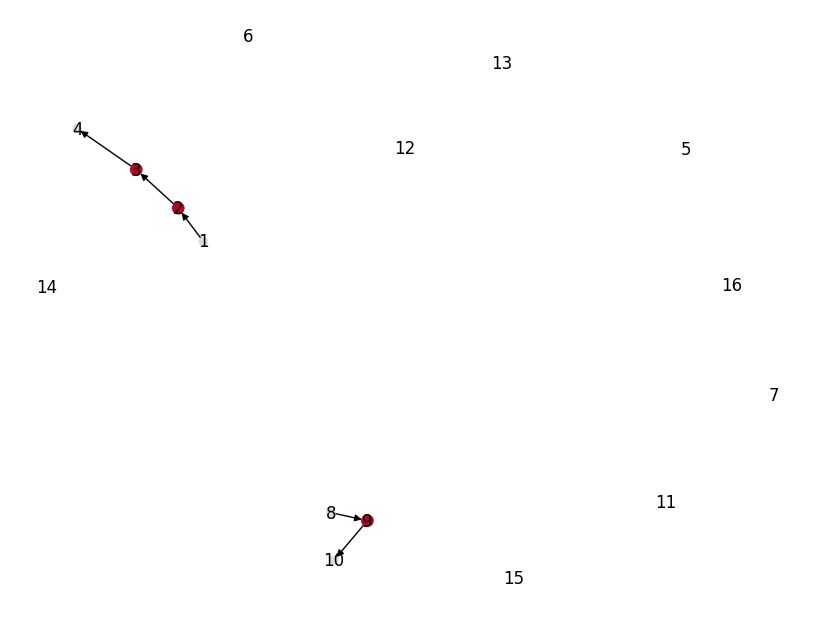

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # pentru detectare comunități

# --- Construim graful orientat ---
G_orientat = nx.DiGraph()

# Adăugăm noduri
for el in saved_elements:
    if "source" not in el["data"]:
        G_orientat.add_node(el["data"]["id"], label=el["data"]["label"])

# Adăugăm muchii
for el in saved_elements:
    if "source" in el["data"]:
        G_orientat.add_edge(el["data"]["source"], el["data"]["target"])

# --- Analitice care merg pe graf orientat ---
print("Număr noduri:", G_orientat.number_of_nodes())
print("Număr muchii:", G_orientat.number_of_edges())

# Centralitate de grad (inclusiv pentru graf orientat)
deg_cent = nx.degree_centrality(G_orientat)
print("Centralitate de grad:", deg_cent)

# --- Creăm o copie neorientată pentru metrici care necesită graf neorientat ---
G_neorientat = G_orientat.to_undirected()

# Coeficient de clustering
clustering = nx.clustering(G_neorientat)
print("Coeficient de clustering:", clustering)

# Detectare comunități (Louvain)
partition = community_louvain.best_partition(G_neorientat)
print("Comunități (nod: comunitate):", partition)

# --- Vizualizare grafic ---
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G_orientat, seed=42)  # folosește orientatul pentru layout
nx.draw(G_orientat, pos, with_labels=True,
        node_size=[500*deg_cent[n] for n in G_orientat.nodes()],
        node_color=[deg_cent[n] for n in G_orientat.nodes()],
        cmap=plt.cm.coolwarm)
plt.show()